## 1. Problem Statement
- This project understands how the student's performance (test score) is affected by thr other variables such as Gender, Ethnicity, Parental level of Education , Lunch, and Test preparation Course.  

## 2. Data Collection 
- Dataset source  [https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977)
- dataset consists of 8 columns and 1000 rows

### 2.1 Import the required datasets
1. Pandas
2. Numpy
3. Matpkotlib
4. Seaborn
5. Warnings

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline


warnings.filterwarnings("ignore")

### Importthe dataset

In [2]:
df = pd.read_csv("./dataset/study.csv")

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.columns = df.columns.str.replace("_", " ")

In [5]:
df.isna().sum()

gender                         0
race ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### There are no missing values in the dataset

In [6]:
df.duplicated().sum()

0

### There are no duplicate values

In [7]:
df.nunique()

gender                          2
race ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != "O"]
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]

# print columns
print(
    "We have {} numerical features : {}".format(len(numeric_features), numeric_features)
)
print(
    "\nWe have {} categorical features : {}".format(
        len(categorical_features), categorical_features
    )
)

We have 3 numerical features : ['math score', 'reading score', 'writing score']

We have 5 categorical features : ['gender', 'race ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [48]:
df["total score"] = df["math score"] + df["reading score"] + df["writing score"]
df["average"] = df["total score"] / 3
df.head()

,gender,race ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [56]:
reading_full = df[df["reading score"] == 100]["average"].count()
writing_full = df[df["writing score"] == 100]["average"].count()
math_full = df[df["math score"] == 100]["average"].count()

print(f"Number of students with full marks in Maths: {math_full}")
print(f"Number of students with full marks in Writing: {writing_full}")
print(f"Number of students with full marks in Reading: {reading_full}")

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [14]:
reading_less_20 = df[df["reading score"] <= 20]["average"].count()
writing_less_20 = df[df["writing score"] <= 20]["average"].count()
math_less_20 = df[df["math score"] <= 20]["average"].count()

print(f"Number of students with less than 20 marks in Maths: {math_less_20}")
print(f"Number of students with less than 20 marks in Writing: {writing_less_20}")
print(f"Number of students with less than 20 marks in Reading: {reading_less_20}")

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


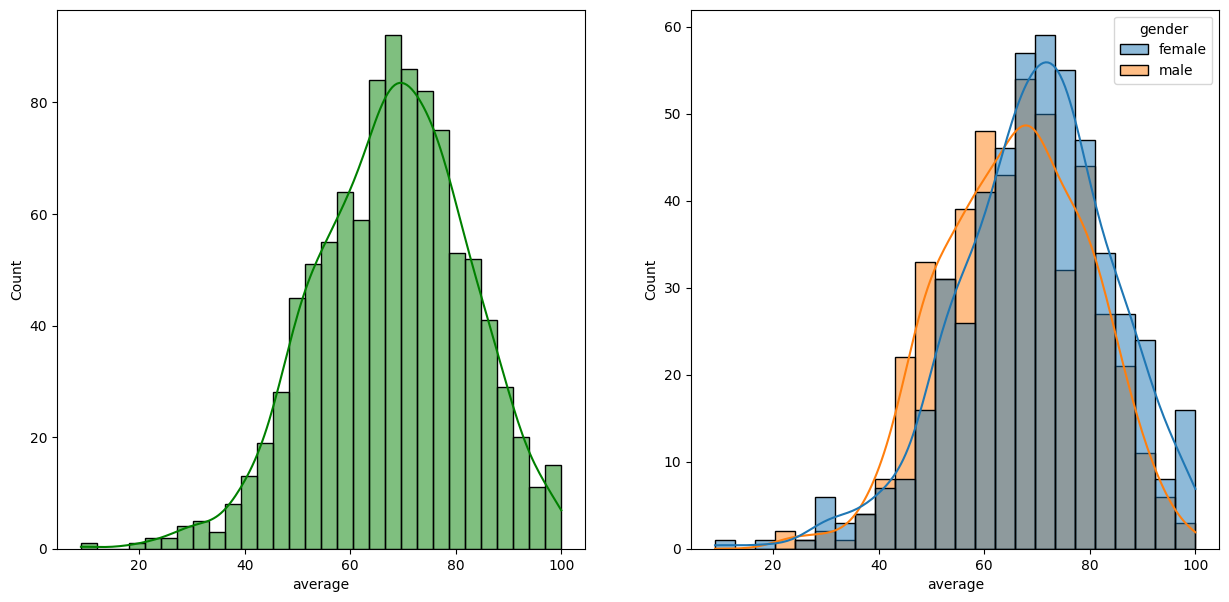

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x="average", bins=30, kde=True, color="g")
plt.subplot(1, 2, 2)
sns.histplot(data=df, x="average", kde=True, hue="gender")
plt.show()

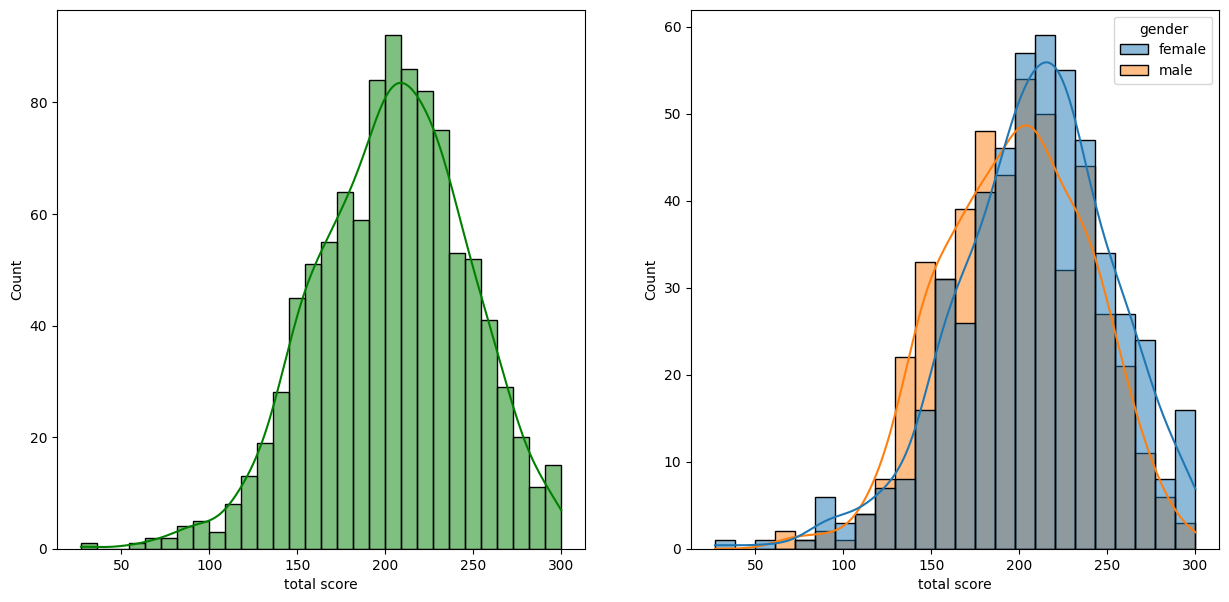

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x="total score", bins=30, kde=True, color="g")
plt.subplot(1, 2, 2)
sns.histplot(data=df, x="total score", kde=True, hue="gender")
plt.show()

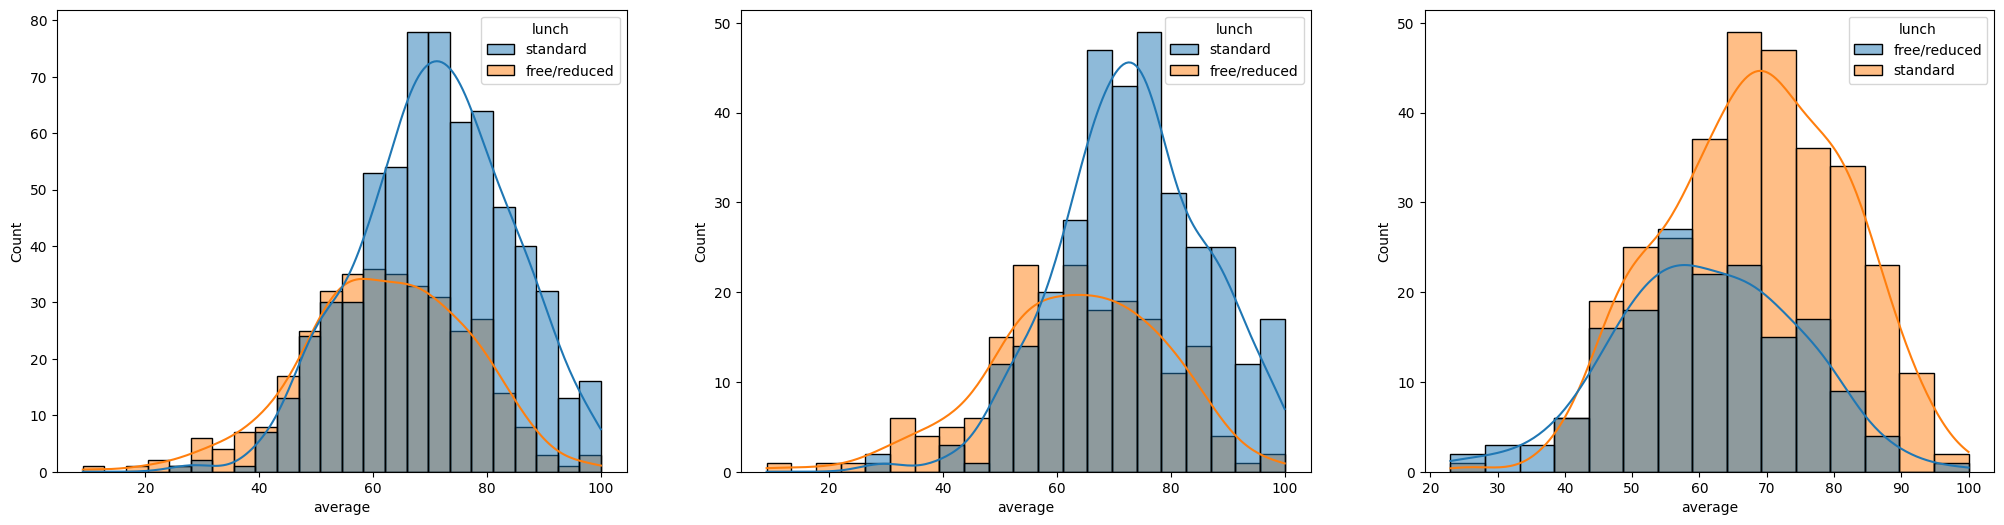

In [19]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(1, 3, 1)
sns.histplot(data=df, x="average", kde=True, hue="lunch")
plt.subplot(1, 3, 2)
sns.histplot(data=df[df.gender == "female"], x="average", kde=True, hue="lunch")
plt.subplot(1, 3, 3)
sns.histplot(data=df[df.gender == "male"], x="average", kde=True, hue="lunch")
plt.show()

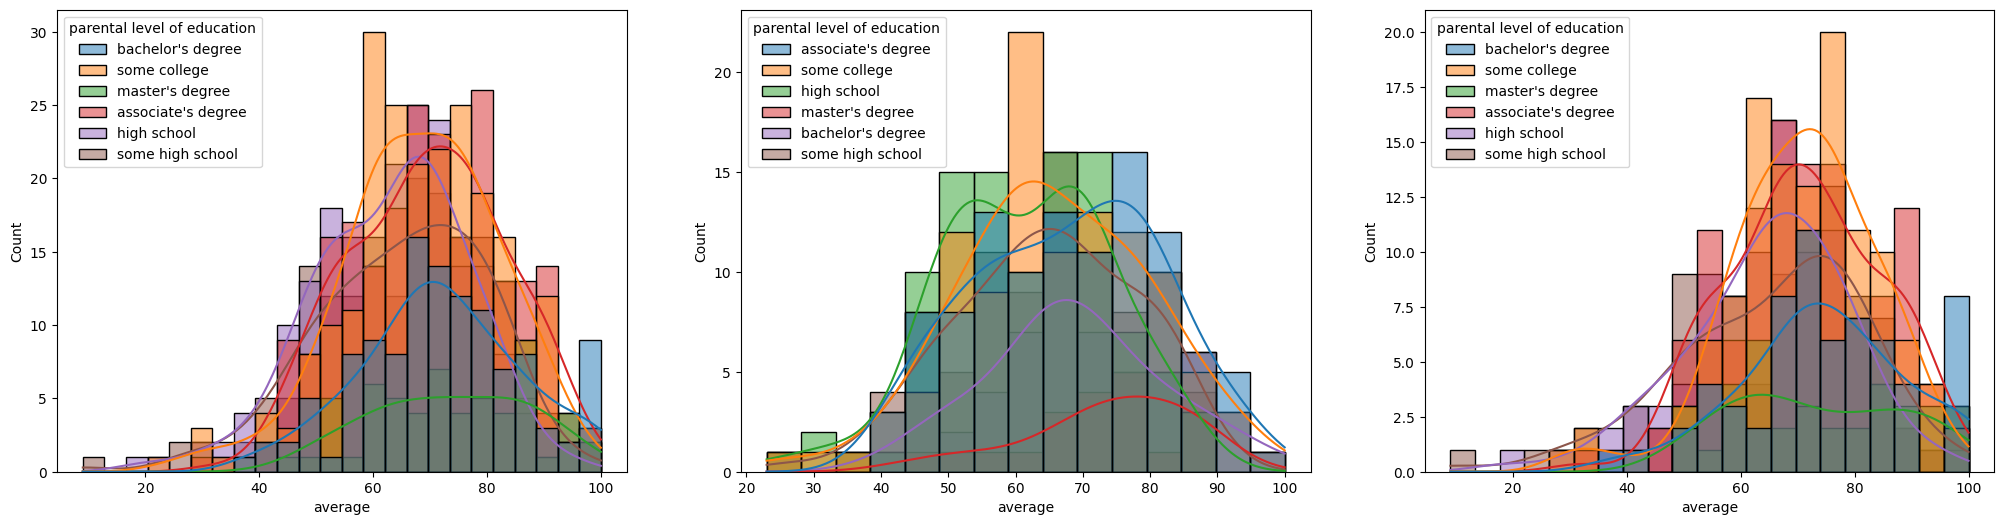

In [20]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(1, 3, 1)
ax = sns.histplot(data=df, x="average", kde=True, hue="parental level of education")
plt.subplot(1, 3, 2)
ax = sns.histplot(
    data=df[df.gender == "male"],
    x="average",
    kde=True,
    hue="parental level of education",
)
plt.subplot(1, 3, 3)
ax = sns.histplot(
    data=df[df.gender == "female"],
    x="average",
    kde=True,
    hue="parental level of education",
)
plt.show()

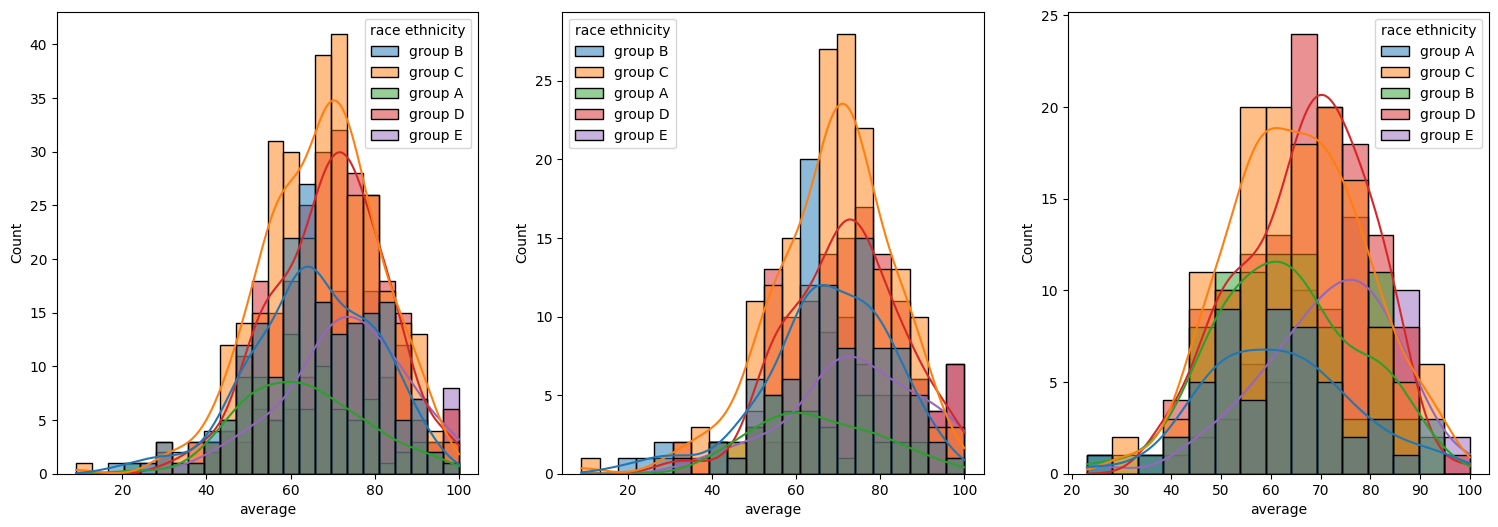

In [24]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
ax = sns.histplot(data=df, x="average", kde=True, hue="race ethnicity")
plt.subplot(142)
ax = sns.histplot(
    data=df[df.gender == "female"], x="average", kde=True, hue="race ethnicity"
)
plt.subplot(143)
ax = sns.histplot(
    data=df[df.gender == "male"], x="average", kde=True, hue="race ethnicity"
)
plt.show()

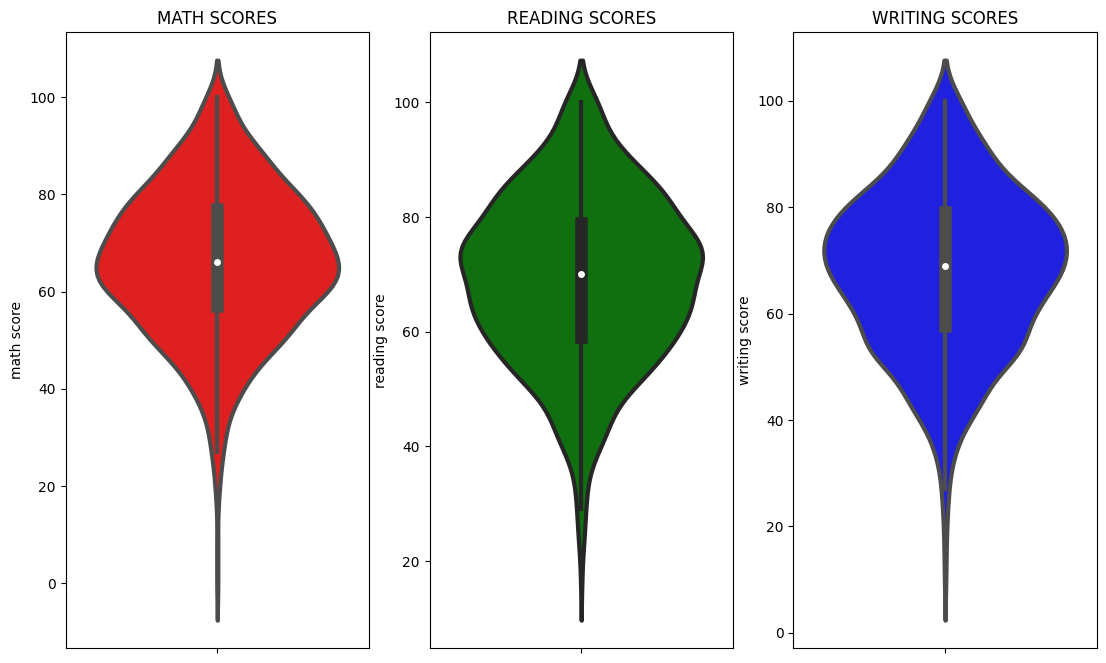

In [25]:
plt.figure(figsize=(18, 8))
plt.subplot(1, 4, 1)
plt.title("MATH SCORES")
sns.violinplot(y="math score", data=df, color="red", linewidth=3)
plt.subplot(1, 4, 2)
plt.title("READING SCORES")
sns.violinplot(y="reading score", data=df, color="green", linewidth=3)
plt.subplot(1, 4, 3)
plt.title("WRITING SCORES")
sns.violinplot(y="writing score", data=df, color="blue", linewidth=3)
plt.show()

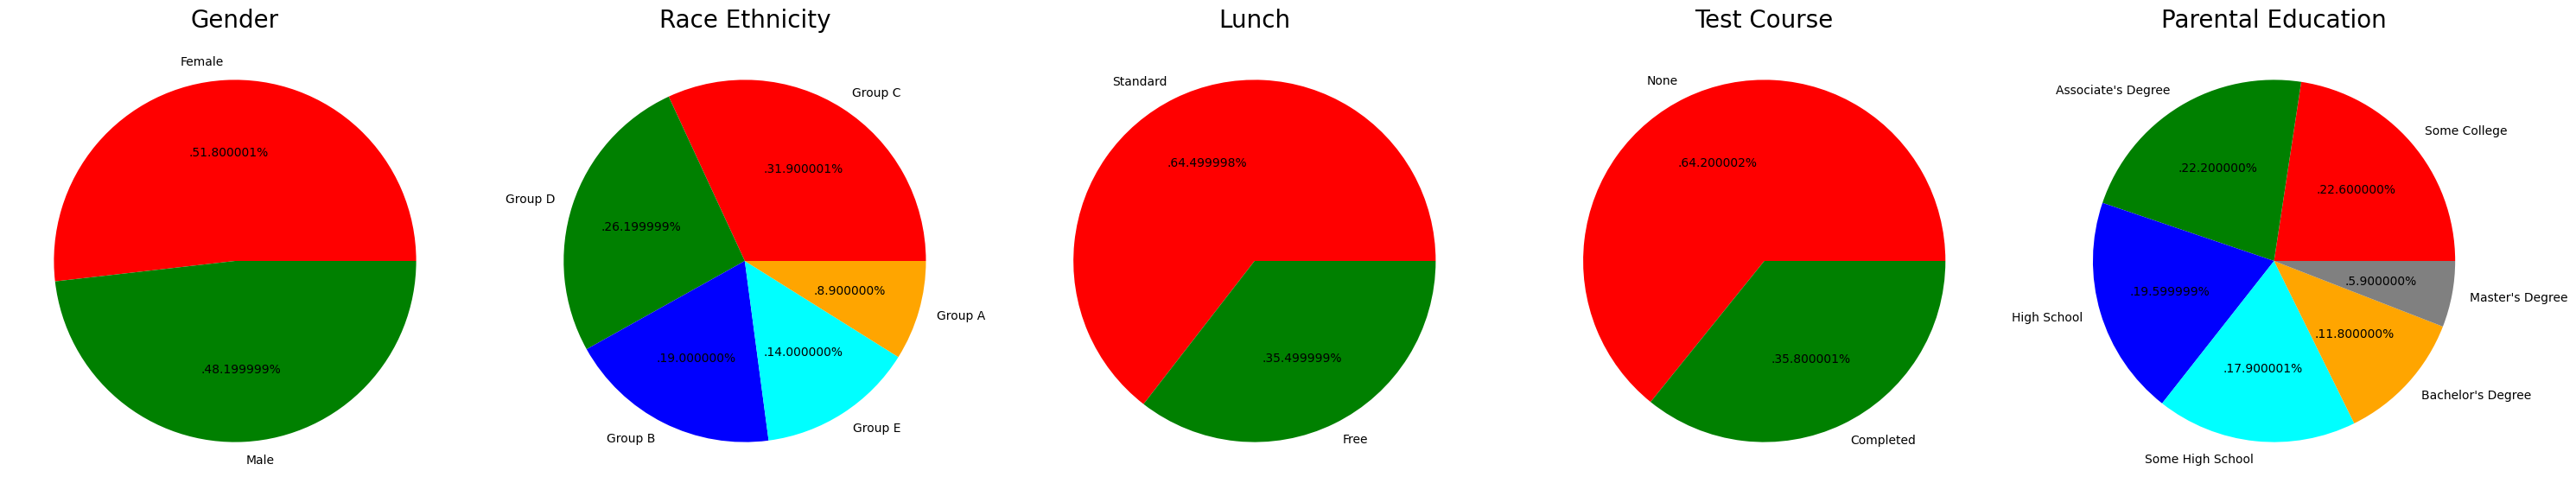

In [30]:
plt.rcParams["figure.figsize"] = (30, 12)

plt.subplot(1, 5, 1)
size = df["gender"].value_counts()
labels = ("Female", "Male")
color = ["red", "green"]


plt.pie(size, colors=color, labels=labels, autopct=".%2f%%")
plt.title("Gender", fontsize=20)
plt.axis("off")


plt.subplot(1, 5, 2)
size = df["race ethnicity"].value_counts()
labels = "Group C", "Group D", "Group B", "Group E", "Group A"
color = ["red", "green", "blue", "cyan", "orange"]

plt.pie(size, colors=color, labels=labels, autopct=".%2f%%")
plt.title("Race Ethnicity", fontsize=20)
plt.axis("off")


plt.subplot(1, 5, 3)
size = df["lunch"].value_counts()
labels = ("Standard", "Free")
color = ["red", "green"]

plt.pie(size, colors=color, labels=labels, autopct=".%2f%%")
plt.title("Lunch", fontsize=20)
plt.axis("off")


plt.subplot(1, 5, 4)
size = df["test preparation course"].value_counts()
labels = ("None", "Completed")
color = ["red", "green"]

plt.pie(size, colors=color, labels=labels, autopct=".%2f%%")
plt.title("Test Course", fontsize=20)
plt.axis("off")


plt.subplot(1, 5, 5)
size = df["parental level of education"].value_counts()
labels = (
    "Some College",
    "Associate's Degree",
    "High School",
    "Some High School",
    "Bachelor's Degree",
    "Master's Degree",
)
color = ["red", "green", "blue", "cyan", "orange", "grey"]

plt.pie(size, colors=color, labels=labels, autopct=".%2f%%")
plt.title("Parental Education", fontsize=20)
plt.axis("off")


plt.tight_layout()
plt.grid()

plt.show()

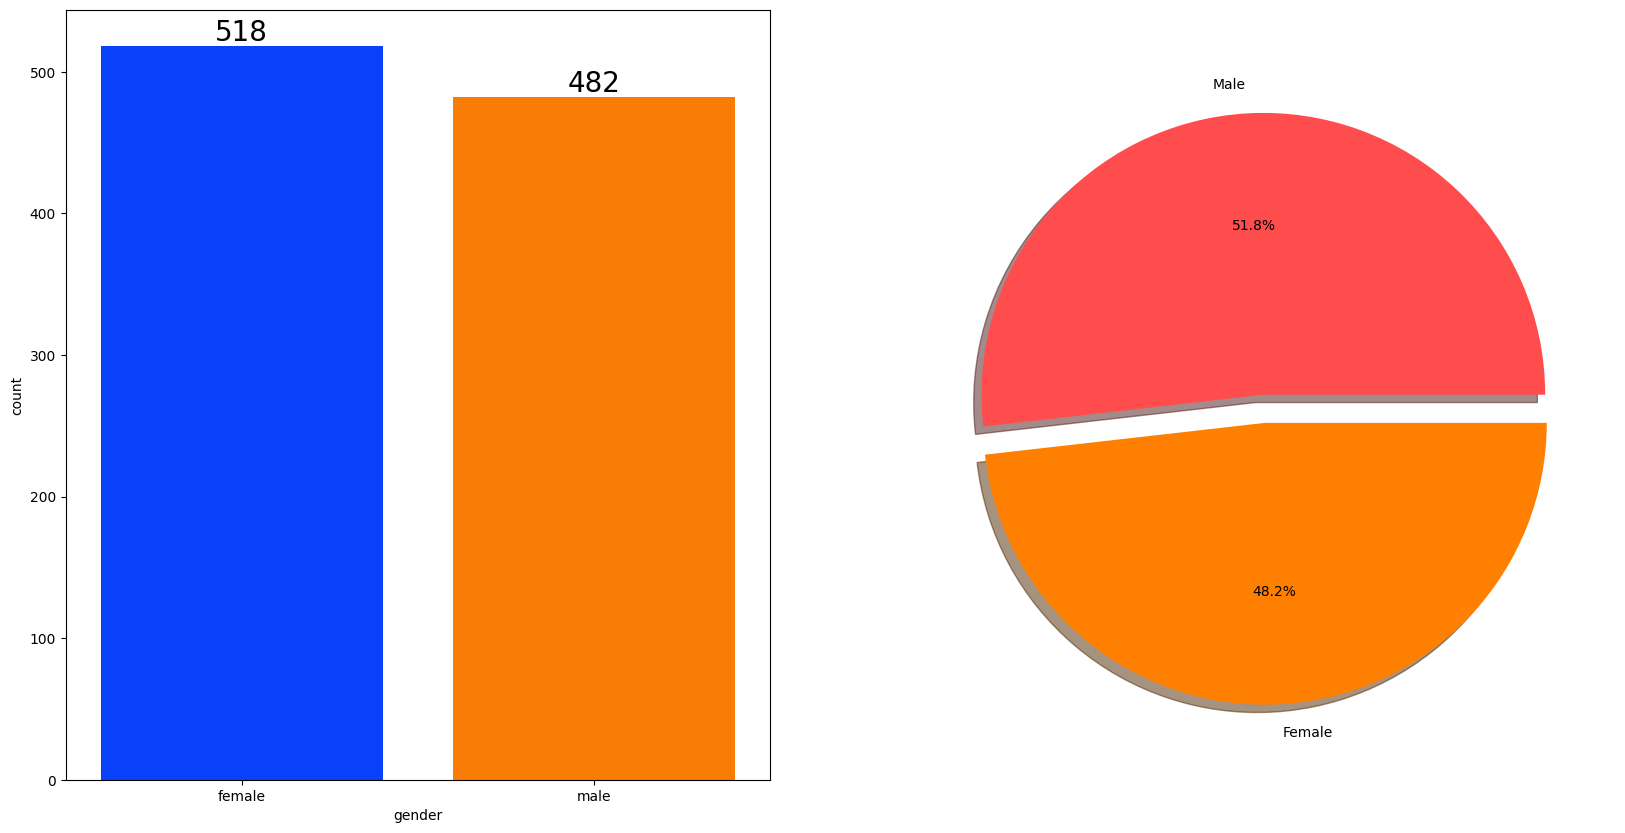

In [33]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.countplot(x=df["gender"], data=df, palette="bright", ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color="black", size=20)

plt.pie(
    x=df["gender"].value_counts(),
    labels=["Male", "Female"],
    explode=[0, 0.1],
    autopct="%1.1f%%",
    shadow=True,
    colors=["#ff4d4d", "#ff8000"],
)
plt.show()

In [43]:
gender_group = df.groupby("gender")
gender_group.head()

,gender,race ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
5,female,group B,associate's degree,standard,none,71,83,78,232,77.333333
6,female,group B,some college,standard,completed,88,95,92,275,91.666667
7,male,group B,some college,free/reduced,none,40,43,39,122,40.666667
8,male,group D,high school,free/reduced,completed,64,64,67,195,65.000000
10,male,group C,associate's degree,standard,none,58,54,52,164,54.666667


TypeError: unhashable type: 'numpy.ndarray'

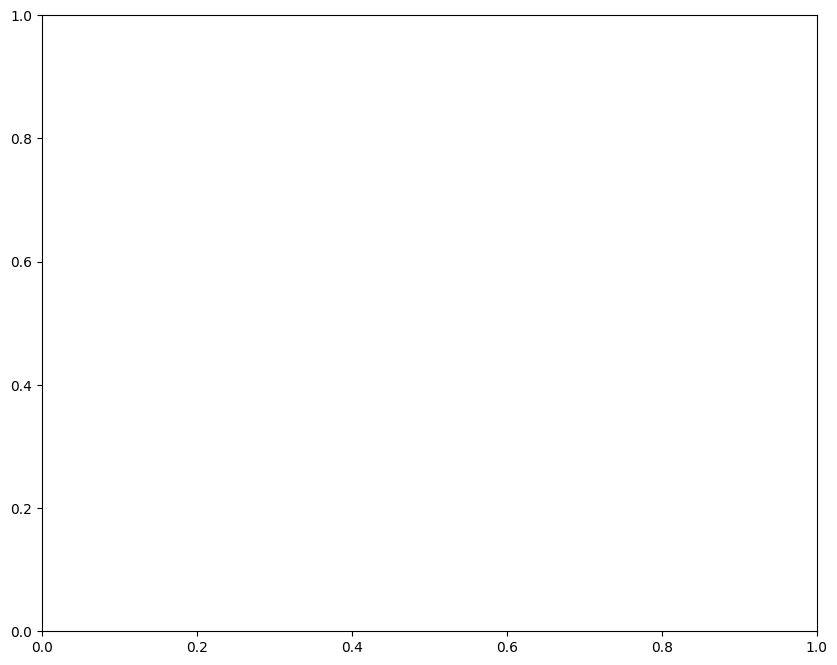

In [47]:
plt.figure(figsize=(10, 8))

X = ["Total Average", "Math Average"]

female_scores = [gender_group["average"], gender_group["math score"]]
male_scores = [gender_group["average"], gender_group["math score"]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label="Male")
plt.bar(X_axis + 0.2, female_scores, 0.4, label="Female")

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight="bold")
plt.legend()
plt.show()